In this dataset we will be predicting whether the fraud was taken place or not in the insurance claim dataset for the country US, so here we will use logistic regression and other classification techniques to predict.

In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('autofraud1.csv',names=range(0,37),header=0)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


PERFORMING EXPLORATORY DATA ANALYSIS

In [5]:
df.shape

(1000, 37)

In [6]:
#checking datatypes for different column
df.dtypes

0       int64
1       int64
2       int64
3      object
4      object
5       int64
6     float64
7       int64
8       int64
9      object
10     object
11     object
12     object
13     object
14      int64
15      int64
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23      int64
24      int64
25     object
26      int64
27      int64
28     object
29      int64
30      int64
31      int64
32      int64
33     object
34     object
35      int64
36     object
dtype: object

In [7]:
#checking null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   int64  
 1   1       1000 non-null   int64  
 2   2       1000 non-null   int64  
 3   3       1000 non-null   object 
 4   4       1000 non-null   object 
 5   5       1000 non-null   int64  
 6   6       1000 non-null   float64
 7   7       1000 non-null   int64  
 8   8       1000 non-null   int64  
 9   9       1000 non-null   object 
 10  10      1000 non-null   object 
 11  11      1000 non-null   object 
 12  12      1000 non-null   object 
 13  13      1000 non-null   object 
 14  14      1000 non-null   int64  
 15  15      1000 non-null   int64  
 16  16      1000 non-null   object 
 17  17      822 non-null    object 
 18  18      1000 non-null   object 
 19  19      1000 non-null   object 
 20  20      1000 non-null   object 
 21  21      1000 non-null   object 
 22  2

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

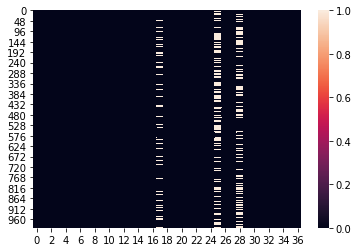

In [9]:
sns.heatmap(df.isnull())      #null values is present in the dataset

In [10]:
df[17]

0       Side Collision
1                  NaN
2       Rear Collision
3      Front Collision
4                  NaN
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999                NaN
Name: 17, Length: 1000, dtype: object

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
imp=SimpleImputer(strategy='most_frequent')

In [13]:
df[17]=imp.fit_transform(df[17].values.reshape(-1,1))

In [14]:
df[17].isnull().sum()

0

In [15]:
df[25]

0      YES
1      NaN
2       NO
3      NaN
4       NO
      ... 
995    YES
996    YES
997    NaN
998    NaN
999    NaN
Name: 25, Length: 1000, dtype: object

In [16]:
df[25]=imp.fit_transform(df[25].values.reshape(-1,1))

In [17]:
df[25].isnull().sum()

0

In [18]:
df[28]

0      YES
1      NaN
2       NO
3       NO
4       NO
      ... 
995    NaN
996    NaN
997    YES
998    YES
999    NaN
Name: 28, Length: 1000, dtype: object

In [19]:
df[28]=imp.fit_transform(df[28].values.reshape(-1,1))

In [20]:
df[28].isna().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   int64  
 1   1       1000 non-null   int64  
 2   2       1000 non-null   int64  
 3   3       1000 non-null   object 
 4   4       1000 non-null   object 
 5   5       1000 non-null   int64  
 6   6       1000 non-null   float64
 7   7       1000 non-null   int64  
 8   8       1000 non-null   int64  
 9   9       1000 non-null   object 
 10  10      1000 non-null   object 
 11  11      1000 non-null   object 
 12  12      1000 non-null   object 
 13  13      1000 non-null   object 
 14  14      1000 non-null   int64  
 15  15      1000 non-null   int64  
 16  16      1000 non-null   object 
 17  17      1000 non-null   object 
 18  18      1000 non-null   object 
 19  19      1000 non-null   object 
 20  20      1000 non-null   object 
 21  21      1000 non-null   object 
 22  2

In [22]:
#converting catagorical values to numerical value

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
a=[3,4,9,10,11,12,13,16,17,18,19,20,21,22,25,28,33,34,36]

In [25]:
for i in a:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

In [26]:
df.dtypes

0       int64
1       int64
2       int64
3       int32
4       int32
5       int64
6     float64
7       int64
8       int64
9       int32
10      int32
11      int32
12      int32
13      int32
14      int64
15      int64
16      int32
17      int32
18      int32
19      int32
20      int32
21      int32
22      int32
23      int64
24      int64
25      int32
26      int64
27      int64
28      int32
29      int64
30      int64
31      int64
32      int64
33      int32
34      int32
35      int64
36      int32
dtype: object

In [27]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,0,6500,1300,650,4550,0,31,2009,0


In [28]:
#so finally we have removed the null values and converted cat values to num values

In [29]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


From the above we can see by observing the values between 3rd quartile and max value, that how the values deviate and this deviation usually produce outliers. as we can see in column 0,2,6,8 and so on.

In [409]:
#seperating the data in x and y

In [410]:
x=df.drop(36,axis=1)

In [411]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,1,2,1,71610,6510,13020,52080,10,1,2004
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,2,3,0,34650,7700,3850,23100,4,30,2007
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,1,2,0,63400,6340,6340,50720,3,34,2014
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,0,1,0,6500,1300,650,4550,0,31,2009


In [412]:
y=df[36].values
y=y.reshape(-1,1)

In [413]:
y.shape

(1000, 1)

In [414]:
x.shape

(1000, 36)

In [415]:
x.skew()

0     0.362177
1     0.478988
2     0.038991
3    -0.026177
4     0.088928
5     0.477887
6     0.004402
7     1.806712
8     0.816554
9     0.148630
10   -0.000148
11   -0.058881
12   -0.061563
13    0.077488
14    0.478850
15   -0.391472
16    0.101507
17   -0.033682
18    0.279016
19   -0.121744
20   -0.148865
21    0.049531
22    0.000000
23   -0.035584
24    0.502664
25    0.863806
26    0.014777
27    0.019636
28    0.802728
29   -0.594582
30    0.264811
31    0.378169
32   -0.621098
33   -0.018797
34   -0.080773
35   -0.048289
dtype: float64

In [416]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000


In [417]:
#data visualization

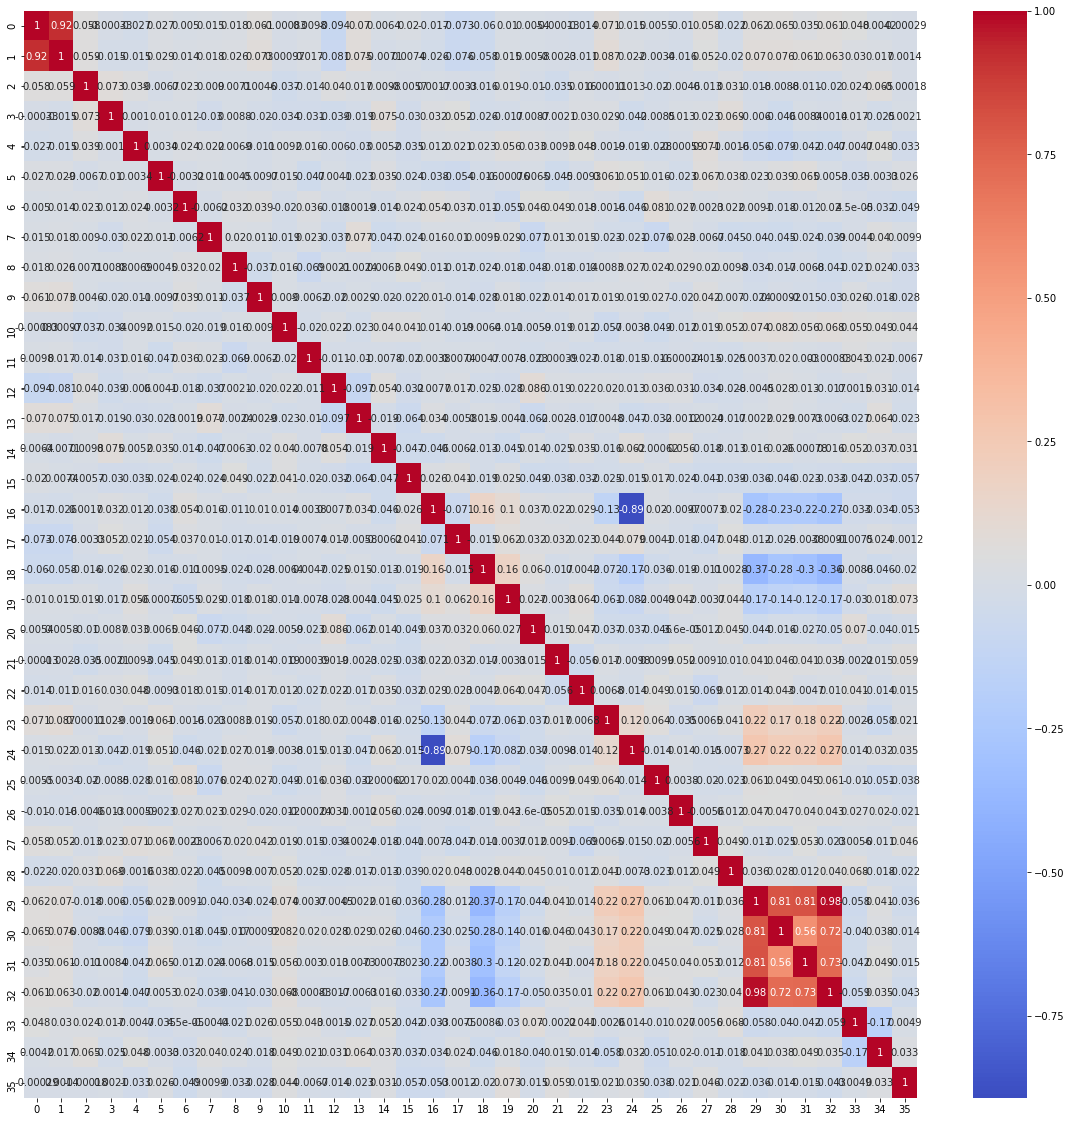

In [418]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot=True,cmap='coolwarm')

#so from the below graph we can interpret that most of the values are not correlated amongst each other

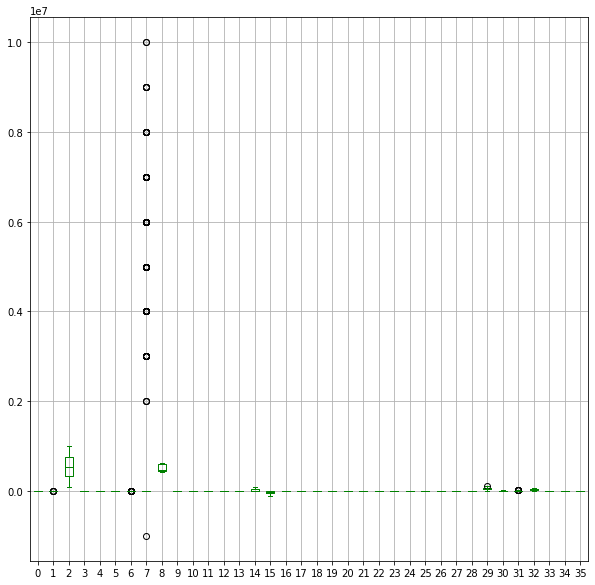

In [419]:
x.boxplot(figsize=(10,10),color='green')      #shows outliers

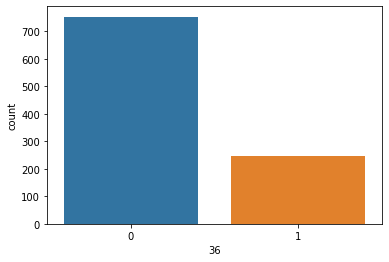

In [420]:
sns.countplot(df[36])     #count of target

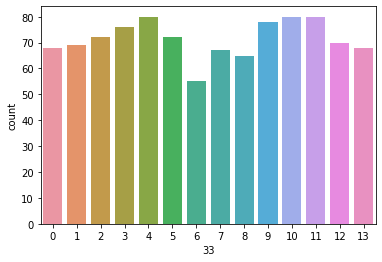

In [421]:
sns.countplot(df[33])     #count of auto_make

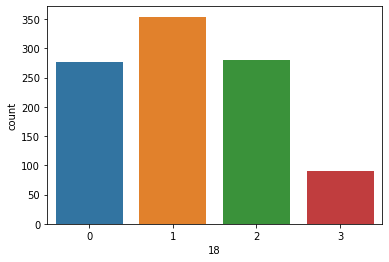

In [422]:
sns.countplot(df[18])   #count of incident_severity

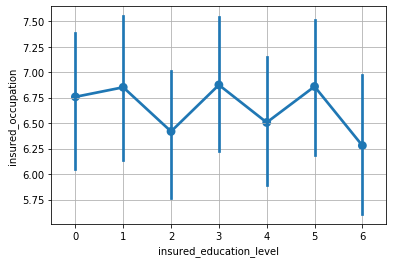

In [423]:
sns.pointplot(x[10],x[11])
plt.xlabel('insured_education_level')
plt.ylabel('insured_occupation')
plt.grid()

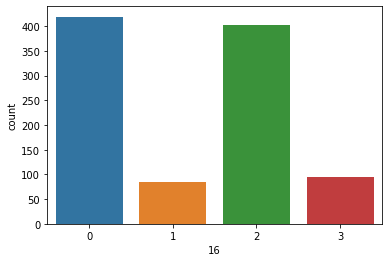

In [424]:
sns.countplot(df[16])     #count of incident type

In [425]:
#removing outliers

In [426]:
from scipy.stats import zscore

In [427]:
z=np.abs(zscore(x))  

In [428]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 31,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


In [429]:
x_new=df[(z<2.5).all(axis=1)]

In [430]:
x_new.shape

(918, 37)

In [431]:
#now we will use the dimensionality reduction technique to reduce the dimension from 37 columns to 9 coulumns

In [432]:
from sklearn.decomposition import PCA

In [433]:
pca=PCA(n_components=9)

In [434]:
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)

In [435]:
x.head()

,0,1,2,3,4,5,6,7,8
0,-1.101083e+06,-23646.789381,-34112.711012,20670.471540,-4879.372545,39486.563517,1015.703438,4635.826583,-167.933051
1,3.898809e+06,-207311.768230,-33228.148408,-62659.600481,-28715.761790,8.543307,-941.252249,-183.101452,886.966911
2,3.899096e+06,137391.643846,-72115.597408,-24877.735188,-11165.688674,28076.532632,-2701.837207,-2672.669125,847.341308
3,4.898725e+06,-323180.946551,103428.990498,25413.418553,42331.529723,-3588.709648,6144.792671,-369.624737,888.324068
4,4.898896e+06,-183347.746886,107659.539486,-47848.720389,50477.174417,17543.641425,-479.425223,-437.862800,-182.939011


In [436]:
#now we will use scaling technique to standardize the dataset

In [437]:
from sklearn.preprocessing import StandardScaler

In [438]:
std=StandardScaler()

In [439]:
x=std.fit_transform(x)
x=pd.DataFrame(data=x)

In [440]:
x.head()

,0,1,2,3,4,5,6,7,8
0,-0.479511,-0.092038,-0.475913,0.630619,-0.170974,1.450033,0.255732,1.449936,-0.276279
1,1.697895,-0.806895,-0.463572,-1.911633,-1.006206,0.000314,-0.236987,-0.057268,1.459214
2,1.698020,0.534753,-1.006099,-0.758976,-0.391248,1.031032,-0.680263,-0.835924,1.394023
3,2.133349,-1.257878,1.442958,0.775318,1.483305,-0.131785,1.547123,-0.115607,1.461447
4,2.133424,-0.713622,1.501979,-1.459780,1.768730,0.644241,-0.120709,-0.136949,-0.300966


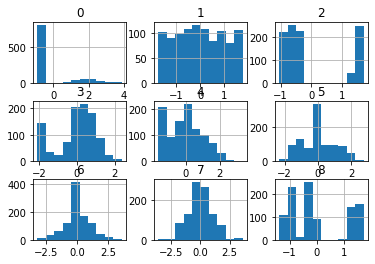

<Figure size 432x288 with 0 Axes>

In [441]:
x.hist()
plt.figure()
plt.show()

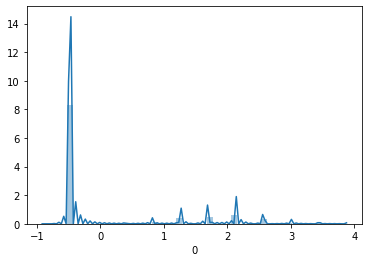

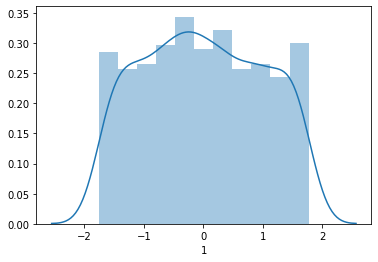

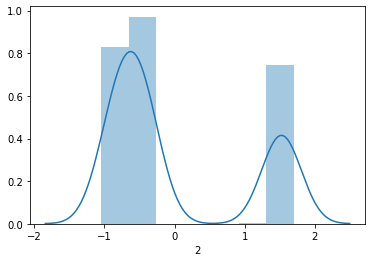

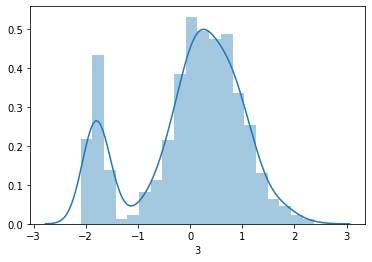

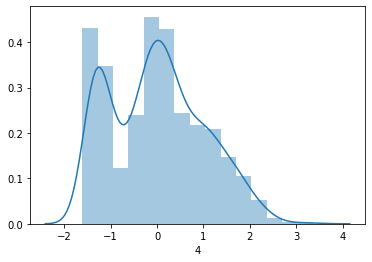

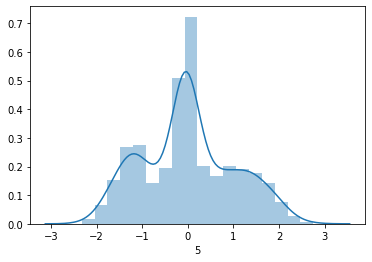

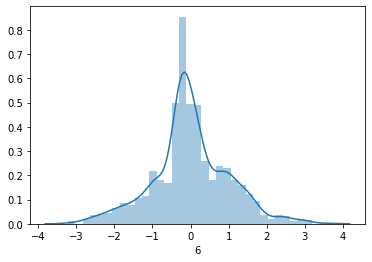

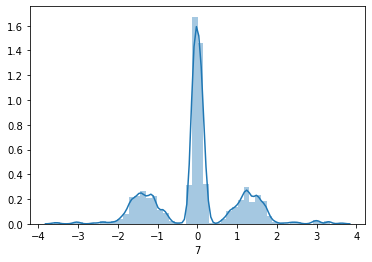

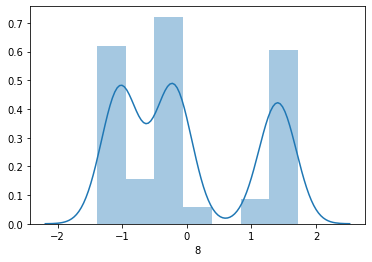

In [442]:
for i in x.columns:
    plt.figure()
    sns.distplot(x[i])  

In [443]:
#performing analysis with various models

In [444]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [445]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(pred,y_test)
    print("accuracy score corrosponding to random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("the max accuracy score for final random state",final_r_state,"is:",max_acc_score)

accuracy score corrosponding to random state: 42 is: 0.725
accuracy score corrosponding to random state: 43 is: 0.75
accuracy score corrosponding to random state: 44 is: 0.765
accuracy score corrosponding to random state: 45 is: 0.75
accuracy score corrosponding to random state: 46 is: 0.785
accuracy score corrosponding to random state: 47 is: 0.715
accuracy score corrosponding to random state: 48 is: 0.795
accuracy score corrosponding to random state: 49 is: 0.79
accuracy score corrosponding to random state: 50 is: 0.77
accuracy score corrosponding to random state: 51 is: 0.735
accuracy score corrosponding to random state: 52 is: 0.795
accuracy score corrosponding to random state: 53 is: 0.725
accuracy score corrosponding to random state: 54 is: 0.755
accuracy score corrosponding to random state: 55 is: 0.765
accuracy score corrosponding to random state: 56 is: 0.765
accuracy score corrosponding to random state: 57 is: 0.73
accuracy score corrosponding to random state: 58 is: 0.755
ac

In [446]:
#so from the above, we can conclude that logistic regression will work with 80% accuracy.

In [447]:
#checking the classification report and confusion matrix

In [448]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       150
           1       0.00      0.00      0.00        50

    accuracy                           0.75       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.56      0.75      0.64       200



In [449]:
confusion_matrix(y_test,pred)

array([[150,   0],
       [ 50,   0]], dtype=int64)

In [450]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=0.20)

In [451]:
svc=SVC()

In [452]:
#using hyperparameter for svc

In [453]:
param={'kernel':('rbf','linear','poly'),'C':[0,1,10]}

In [454]:
from sklearn.model_selection import GridSearchCV

In [455]:
gd=GridSearchCV(svc,param_grid=param)

In [456]:
gd.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'linear', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [457]:
gd.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [458]:
gd.best_params_

{'C': 1, 'kernel': 'linear'}

In [459]:
gd.best_score_

0.7529999999999999

In [460]:
#hence svc is giving 75% accuracy result

In [461]:
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predkn=knn.predict(x_test)
    print("accuracy score with neighbors",i,"is:",accuracy_score(y_test,predkn))

accuracy score with neighbors 1 is: 0.675
accuracy score with neighbors 2 is: 0.765
accuracy score with neighbors 3 is: 0.68
accuracy score with neighbors 4 is: 0.77
accuracy score with neighbors 5 is: 0.71
accuracy score with neighbors 6 is: 0.77
accuracy score with neighbors 7 is: 0.735
accuracy score with neighbors 8 is: 0.79
accuracy score with neighbors 9 is: 0.75
accuracy score with neighbors 10 is: 0.795
accuracy score with neighbors 11 is: 0.785
accuracy score with neighbors 12 is: 0.8
accuracy score with neighbors 13 is: 0.785
accuracy score with neighbors 14 is: 0.81
accuracy score with neighbors 15 is: 0.79
accuracy score with neighbors 16 is: 0.795
accuracy score with neighbors 17 is: 0.795
accuracy score with neighbors 18 is: 0.81
accuracy score with neighbors 19 is: 0.8
accuracy score with neighbors 20 is: 0.8


In [462]:
#from here we can see that knn is giving max 81% accuracy result at n_neighbors=14

In [463]:
gb=GaussianNB()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
accuracy_score(y_test,predgb)

0.81

In [464]:
#gaussian NB is giving 81% accuracy result

In [465]:
a=['gini','entropy']
for i in a:
    dtc=DecisionTreeClassifier(criterion=i)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    print("accuracy score with criterion as",i,"is:",accuracy_score(y_test,preddtc))

accuracy score with criterion as gini is: 0.68
accuracy score with criterion as entropy is: 0.665


In [466]:
#will use ensembiling techniques to boost the result

In [467]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

In [468]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestClassifier(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('accuracy score at',i,'is:',accuracy_score(y_test,predrd))

accuracy score at 150 is: 0.785
accuracy score at 200 is: 0.795
accuracy score at 250 is: 0.79
accuracy score at 300 is: 0.79
accuracy score at 350 is: 0.785


In [469]:
a=[100,200,50,150]
for i in a:
    ad=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME',n_estimators=i,learning_rate=0.1)
    ad.fit(x_train,y_train)
    predad=ad.predict(x_test)
    print("accuracy score at",i,"is:",accuracy_score(y_test,predad))    

accuracy score at 100 is: 0.81
accuracy score at 200 is: 0.81
accuracy score at 50 is: 0.81
accuracy score at 150 is: 0.81


In [470]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingClassifier(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("accuracy score at learning rate",i,"is:",accuracy_score(y_test,predgd))

accuracy score at learning rate 0.1 is: 0.77
accuracy score at learning rate 0.01 is: 0.805
accuracy score at learning rate 1.0 is: 0.695


In [471]:
a=pd.DataFrame({'model':('log reg','knn','gaussNB','SVC','DTC','AdaboostClassifier','RandomForest','Gradientboost'),'scores':(80.5,81,81,75,69,81,80,80)})

In [472]:
#here is the summary of scores the model is giving , choosing the best model for prediction
a

,model,scores
0,log reg,80.5
1,knn,81.0
2,gaussNB,81.0
3,SVC,75.0
4,DTC,69.0
5,AdaboostClassifier,81.0
6,RandomForest,80.0
7,Gradientboost,80.0


In [473]:
#from the above we will finalize Adaboost classifier model

In [474]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=0.20)

In [475]:
ad=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME')   #using base estimator as svc

In [476]:
ad.fit(x_train,y_train)
predad=ad.predict(x_test)

In [501]:
a1=pd.DataFrame(data=predad)
a1.to_csv('auto_fraud.csv')     #saving the predicted result in csv format

In [478]:
accuracy_score(y_test,predad)

0.81

In [479]:
confusion_matrix(y_test,predad)

array([[162,   0],
       [ 38,   0]], dtype=int64)

In [480]:
print(classification_report(y_test,predad))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       162
           1       0.00      0.00      0.00        38

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200



In [481]:
#plotting auc roc curve

In [482]:
from sklearn.metrics import roc_auc_score,roc_curve

In [504]:
y_pred_prob=ad.predict_proba(x_test)[:,1]

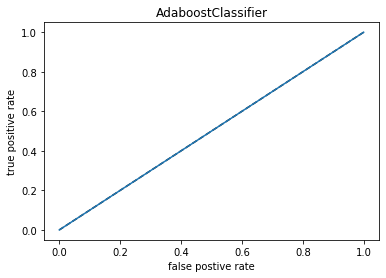

In [503]:
plt.plot([1,0],[1,0],'k--')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel('false postive rate')
plt.ylabel("true positive rate")
plt.title("AdaboostClassifier")
plt.show()

In [492]:
#saving the final model

In [493]:
import joblib

In [505]:
joblib.dump(ad,'auto_fraud')

['auto_fraud']